In [4]:
import Pkg

In [5]:
Pkg.add("Plots")

    Updating registry at `C:\Users\aninh\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\aninh\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\aninh\.julia\environments\v1.7\Manifest.toml`


In [6]:
Pkg.add("FileIO")

   Resolving package versions...
  No Changes to `C:\Users\aninh\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\aninh\.julia\environments\v1.7\Manifest.toml`


In [7]:
Pkg.add("Images")

   Resolving package versions...
  No Changes to `C:\Users\aninh\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\aninh\.julia\environments\v1.7\Manifest.toml`


In [8]:
Pkg.add("VideoIO")

   Resolving package versions...
  No Changes to `C:\Users\aninh\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\aninh\.julia\environments\v1.7\Manifest.toml`


In [9]:
Pkg.build("PyCall")

    Building Conda ─→ `C:\Users\aninh\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\6e47d11ea2776bc5627421d59cdcc1296c058071\build.log`
    Building PyCall → `C:\Users\aninh\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\1fc929f47d7c151c839c5fc1375929766fb8edcc\build.log`


In [10]:
Pkg.add("PyPlot")

   Resolving package versions...
  No Changes to `C:\Users\aninh\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\aninh\.julia\environments\v1.7\Manifest.toml`


In [11]:
using FileIO
using Images
using VideoIO

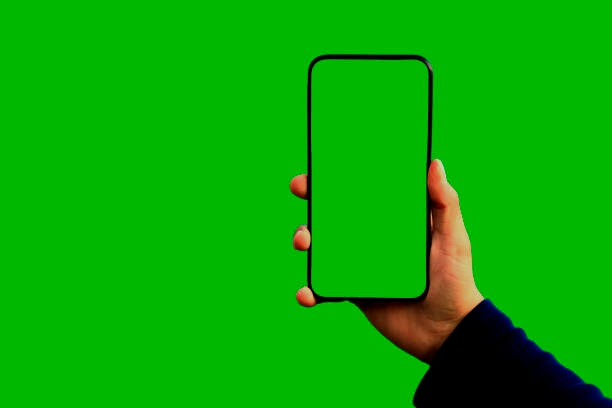

In [43]:
img=load("C:/Users/aninh/.julia/packages/FileIO/Nl9Lh/telefoneeditado.jpg")

In [16]:
function greenmask(img)
	hsvimg = HSV.(img)
	channels = channelview(hsvimg)
	hue = channels[1, :, :]
	sat = channels[2, :, :]
	val = channels[3, :, :]
	mask::AbstractArray{N0f8} = ones(size(hsvimg))
	for index in eachindex(hsvimg)
		if 60 ≤ hue[index] ≤ 140 && sat[index] ≥ 30/255 && val[index] ≥ 30/255 
			mask[index] = 0
		end
	end
	mask
end

greenmask (generic function with 1 method)

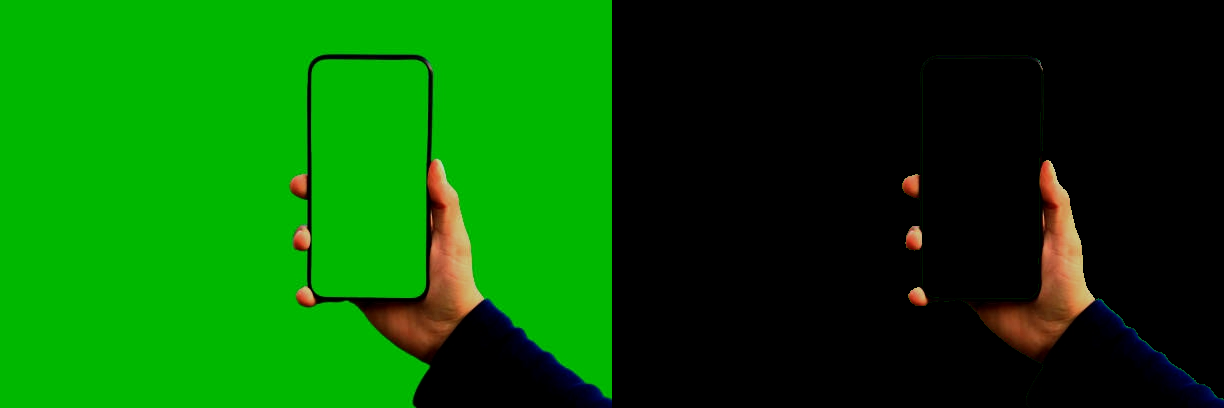

In [44]:
begin
mask = greenmask(img)
hcat(img, img .* mask)
end

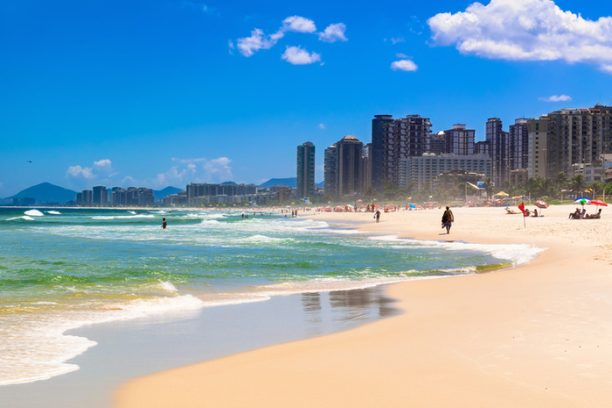

In [45]:
background = imresize(load("C:/Users/aninh/.julia/packages/FileIO/Nl9Lh/fundotelefone.jpg"), size(img))

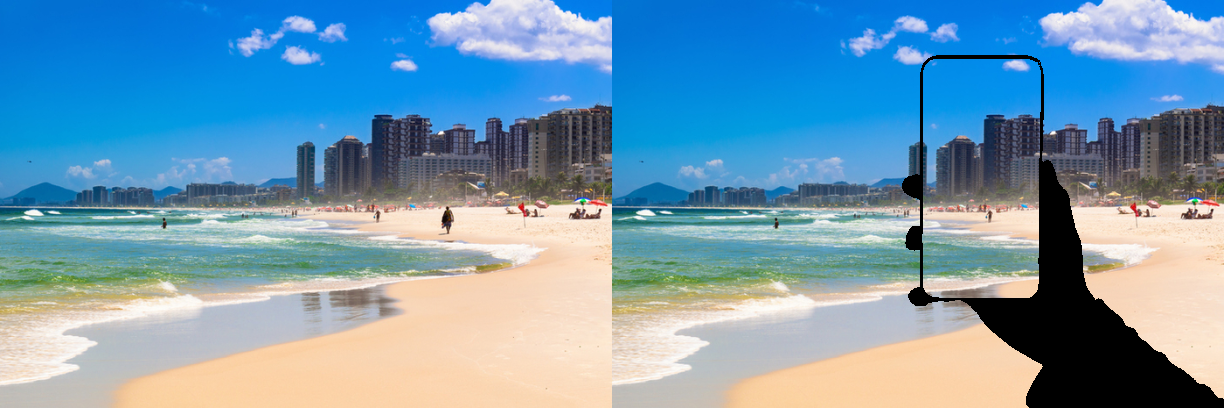

In [46]:
begin
invmask = ones(size(mask)) - mask
hcat(background, invmask .* background)
end

In [29]:
function changebg(img, bg, mask)
	invmask = ones(size(mask)) - mask
	invmask .* bg + mask .* img	
end

changebg (generic function with 1 method)

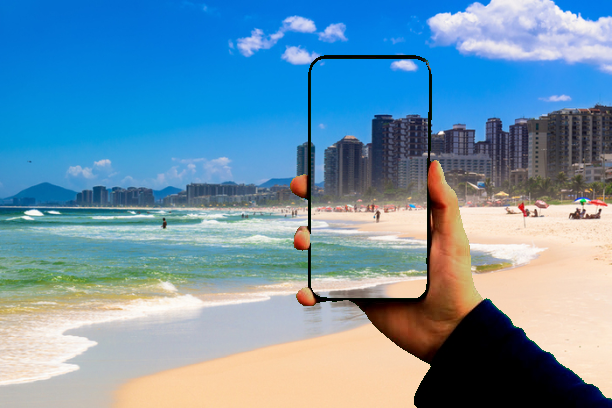

In [47]:
changebg(img, background, mask)

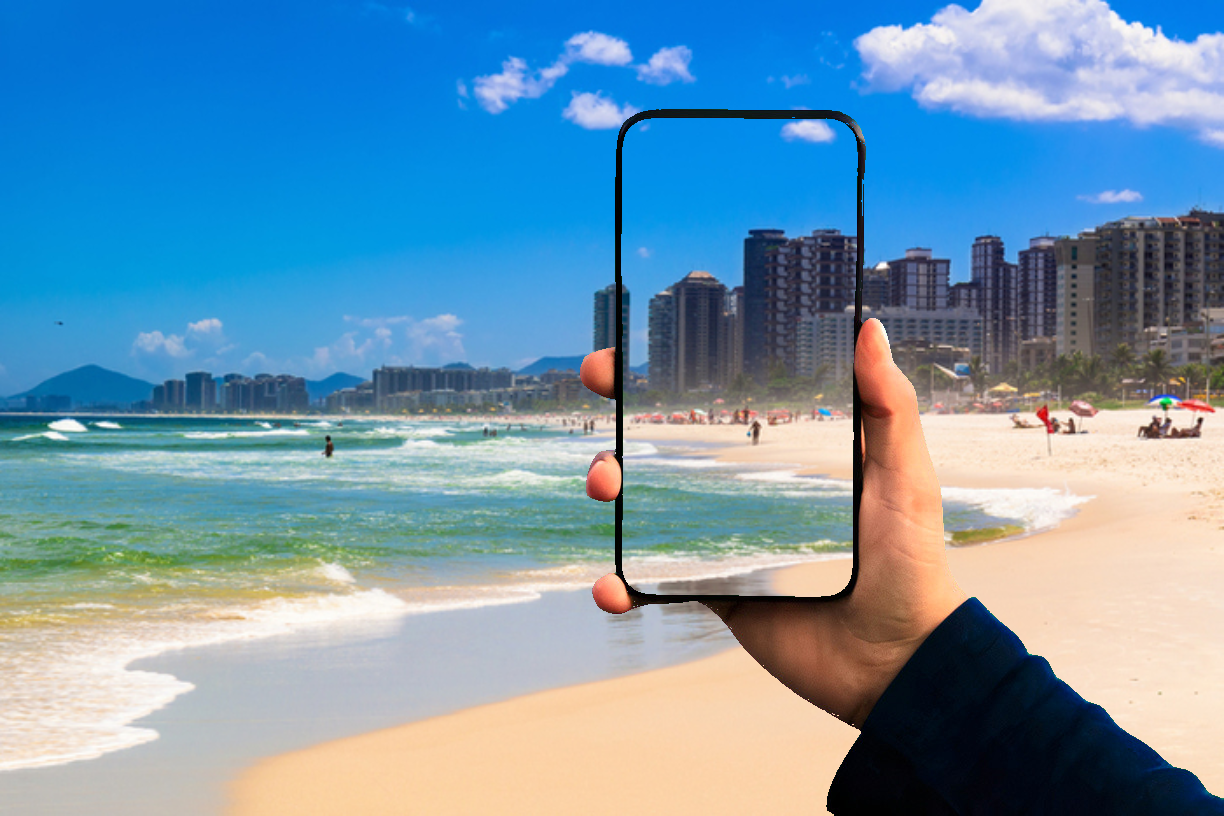

In [31]:
changebg(img2, background2, mask2)